check ddpn bbox data

In [1]:
% cd /home/mayu-ot/durga/Experiments/loc_iparaphrasing/

/mnt/fs1/mayu-ot/Experiments/loc_iparaphrasing


In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
from chainercv.visualizations import vis_bbox
from chainercv.utils import bbox_iou
from imageio import imread
import numpy as np

/home/mayu-ot/miniconda3/envs/py36chainer/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
from func.datasets.datasets import DDPNBBoxDataset, BBoxDataset

In [5]:
data = DDPNBBoxDataset('test')
gt_data = BBoxDataset('test')

(4677535056, 'a dark blue shirt')


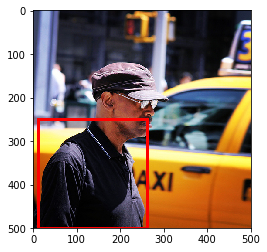

In [14]:
i = np.random.randint(0, len(data))
im, gt_roi = gt_data[i]
label = gt_data.df.iloc[i].name
print(label)
vis_bbox(im.transpose(2, 0, 1), [gt_roi])

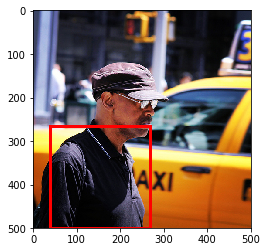

In [15]:
item = data.df[(data.df.image == label[0]) & (data.df.phrase == label[1].lower())]
roi = item[['ymin', 'xmin', 'ymax', 'xmax']].values
vis_bbox(im.transpose(2, 0, 1), roi)

In [16]:
ious = []
for i in range(len(data)):
    item = data.df.iloc[i]
    label = item.image, item.phrase
    try:
        roi = item[['ymin', 'xmin', 'ymax', 'xmax']].values
        gt_roi = gt_data.df.loc[label][['ymin', 'xmin', 'ymax', 'xmax']].values
        ious.append(bbox_iou(roi[None, :], gt_roi[None, :]))
    except:
        pass

(array([409.,  59.,  55.,  49.,  55.,  50.,  57.,  49.,  44.,  44.,  54.,
         50.,  50.,  57.,  47.,  56.,  57.,  67.,  70.,  65.,  74.,  76.,
         81.,  92., 104., 106., 125., 142., 145., 159., 183., 200., 258.,
        224., 239., 289., 292., 343., 367., 413., 410., 450., 384., 368.,
        335., 294., 236., 166.,  86.,  52.]),
 array([0.        , 0.01994633, 0.03989266, 0.05983899, 0.07978532,
        0.09973165, 0.11967798, 0.13962432, 0.15957065, 0.17951698,
        0.19946331, 0.21940964, 0.23935597, 0.2593023 , 0.27924863,
        0.29919496, 0.31914129, 0.33908762, 0.35903395, 0.37898028,
        0.39892662, 0.41887295, 0.43881928, 0.45876561, 0.47871194,
        0.49865827, 0.5186046 , 0.53855093, 0.55849726, 0.57844359,
        0.59838992, 0.61833625, 0.63828259, 0.65822892, 0.67817525,
        0.69812158, 0.71806791, 0.73801424, 0.75796057, 0.7779069 ,
        0.79785323, 0.81779956, 0.83774589, 0.85769222, 0.87763855,
        0.89758489, 0.91753122, 0.93747755, 0.

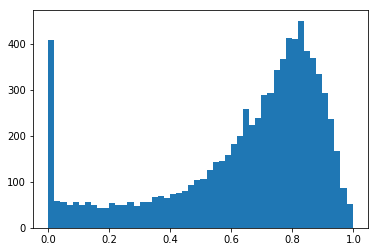

In [17]:
plt.hist(np.asarray(ious).ravel().astype('f'), bins=50)

In [18]:
l = (np.asarray(ious).ravel() > .5)
l.sum() / l.size

0.7693253041661546